<h1 style="color:orange">ANALYZING EFFECTS OF POLE POSITION ON THE RACE RESULTS</h1>

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb


In [4]:
results_df = pd.read_csv('datasets/cleaned/race_results.csv')
results_df.info()
results_df.head()
races_df = pd.read_csv('datasets/cleaned/races.csv')
circuits_df = pd.read_csv('datasets/original/circuits.csv')
drivers_df = pd.read_csv('datasets/cleaned/drivers.csv')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25660 entries, 0 to 25659
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   raceId           25660 non-null  int64  
 1   driverId         25660 non-null  int64  
 2   constructorId    25660 non-null  int64  
 3   grid             25660 non-null  int64  
 4   positionOrder    25660 non-null  int64  
 5   points           25660 non-null  float64
 6   laps             25660 non-null  int64  
 7   time             25660 non-null  object 
 8   milliseconds     25660 non-null  float64
 9   fastestLap       25660 non-null  float64
 10  rank             25660 non-null  float64
 11  fastestLapTime   25660 non-null  object 
 12  fastestLapSpeed  25660 non-null  float64
 13  statusId         25660 non-null  int64  
dtypes: float64(5), int64(7), object(2)
memory usage: 2.7+ MB


In [5]:
circuits_df

,circuitId,circuitRef,name,location,country,lat,lng,alt,url
0,1,albert_park,Albert Park Grand Prix Circuit,Melbourne,Australia,-37.84970,144.96800,10,http://en.wikipedia.org/wiki/Melbourne_Grand_P...
1,2,sepang,Sepang International Circuit,Kuala Lumpur,Malaysia,2.76083,101.73800,18,http://en.wikipedia.org/wiki/Sepang_Internatio...
2,3,bahrain,Bahrain International Circuit,Sakhir,Bahrain,26.03250,50.51060,7,http://en.wikipedia.org/wiki/Bahrain_Internati...
3,4,catalunya,Circuit de Barcelona-Catalunya,Montmeló,Spain,41.57000,2.26111,109,http://en.wikipedia.org/wiki/Circuit_de_Barcel...
4,5,istanbul,Istanbul Park,Istanbul,Turkey,40.95170,29.40500,130,http://en.wikipedia.org/wiki/Istanbul_Park
...,...,...,...,...,...,...,...,...,...
71,75,portimao,Autódromo Internacional do Algarve,Portimão,Portugal,37.22700,-8.62670,108,http://en.wikipedia.org/wiki/Algarve_Internati...
72,76,mugello,Autodromo Internazionale del Mugello,Mugello,Italy,43.99750,11.37190,255,http://en.wikipedia.org/wiki/Mugello_Circuit
73,77,jeddah,Jeddah Corniche Circuit,Jeddah,Saudi Arabia,21.63190,39.10440,15,http://en.wikipedia.org/wiki/Jeddah_Street_Cir...
74,78,losail,Losail International Circuit,Al Daayen,Qatar,25.49000,51.45420,\N,http://en.wikipedia.org/wiki/Losail_Internatio...


In [6]:
results_df['positionOrder'].describe()
# finished_df = results_df[results_df['statusId'] == 1]
pole_df = results_df[results_df['grid'] == 1] #this gets all the winners
# finished_df.rename(columns={'grid':'startingPos','positionOrder':'finishPos'},)
races_df.head()
# finished_df.set_index('raceId').join(races_df.set_index('raceId'))
pole_circuit_df = pd.merge(pole_df,races_df,on='raceId')
pole_circuit_df = pd.merge(pole_circuit_df,circuits_df,on='circuitId')

In [7]:
# finished_circuit_df.drop(columns={'location','country', 'lat', 'lng','alt','round','name_y','date','url','circuitRef','time','points','laps','statusId'},inplace=True)
pole_circuit_df.head()
pole_results_df = pole_circuit_df[['raceId','driverId','circuitId','name_x','grid','positionOrder']]


In [8]:
pole_results_df

,raceId,driverId,circuitId,name_x,grid,positionOrder
0,18,1,1,Australian Grand Prix,1,1
1,36,8,1,Australian Grand Prix,1,1
2,55,18,1,Australian Grand Prix,1,10
3,71,21,1,Australian Grand Prix,1,1
4,90,30,1,Australian Grand Prix,1,1
...,...,...,...,...,...,...
1076,1054,822,75,Portuguese Grand Prix,1,3
1077,1051,1,78,Qatar Grand Prix,1,1
1078,1072,1,77,Saudi Arabian Grand Prix,1,1
1079,1075,815,77,Saudi Arabian Grand Prix,1,4


<h3 style="color:ForestGreen">Analysis of Pole-win Ratio</h3>

In [9]:
%matplotlib inline
import operator
def pwrfor(groupId,relate,position, n=10, minNumPole = 5):
    per_group_df = pole_results_df.groupby(groupId)
    x = pole_results_df[per_group_df['driverId'].transform('count') > minNumPole]
    group_poles = x.groupby(groupId).size()
    per_group_winner_df = x[relate(x['positionOrder'],position)].groupby(groupId)
    group_pole_win_ratio = per_group_winner_df.size()/group_poles
    
#     for key, item in per_group_winner_df:
#         print(per_group_winner_df.get_group(key), "\n\n")
    full_df = pd.DataFrame()
    full_df['group_pole_win_ratio'] = group_pole_win_ratio
    top_df = pd.DataFrame()
    top_df['group_pole_win_ratio'] = group_pole_win_ratio.sort_values(ascending=False).head(n)
    bottom_df = pd.DataFrame()
    bottom_df['group_pole_win_ratio'] = group_pole_win_ratio.sort_values().head(n)
    
    if(groupId == 'circuitId'):
        full_df = pd.merge(full_df, circuits_df, on='circuitId')
        top_df = pd.merge(top_df, circuits_df, on='circuitId')
        bottom_df = pd.merge(bottom_df, circuits_df, on='circuitId')
    elif(groupId == 'driverId'):
        full_df = pd.merge(full_df, drivers_df, on='driverId')
        top_df = pd.merge(top_df, drivers_df, on='driverId')
        bottom_df = pd.merge(bottom_df, drivers_df, on='driverId')

    plt.figure(figsize = (17,5))
    plt.bar(full_df['name'],full_df['group_pole_win_ratio'])
    plt.title(f'Pole-Win Ratio vs {groupId[:-2]}')
    plt.xlabel(f'{groupId}')
    plt.ylabel('Pole-Win Ratio')
    plt.xticks(rotation = 90)
    plt.show()
    
    print(f"The Top {n}: \n {top_df[['name','group_pole_win_ratio']]} ")
    plt.figure(figsize = (17,5))
    plt.bar(top_df['name'],top_df['group_pole_win_ratio'])
    plt.title(f'Top {n} Pole-Win Ratio vs {groupId[:-2]}')
    plt.xlabel(f'{groupId}')
    plt.ylabel('Pole-Win Ratio')
    plt.xticks(rotation = 90)
    plt.show()
    
    print(f"The Bottom {n}: \n {bottom_df[['name','group_pole_win_ratio']]} ")
    plt.figure(figsize = (17,5))
    plt.bar(bottom_df['name'],bottom_df['group_pole_win_ratio'])
    plt.title(f'Bottom {n} Pole-Win Ratio vs {groupId[:-2]}')
    plt.xlabel(f'{groupId}')
    plt.ylabel('Pole-Win Ratio')
    plt.xticks(rotation = 90)
    plt.show()
    


<h3 style="color:orange">Pole-Win Ratio per Circuit and Driver</h3>

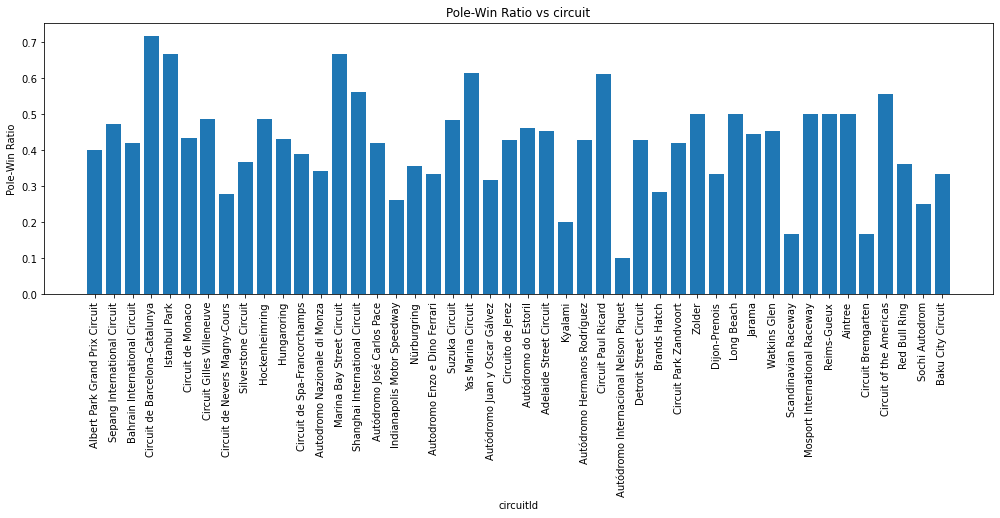

The Top 20: 
                               name  group_pole_win_ratio
0   Circuit de Barcelona-Catalunya              0.718750
1        Marina Bay Street Circuit              0.666667
2                    Istanbul Park              0.666667
3               Yas Marina Circuit              0.615385
4              Circuit Paul Ricard              0.611111
5   Shanghai International Circuit              0.562500
6          Circuit of the Americas              0.555556
7                          Aintree              0.500000
8                      Reims-Gueux              0.500000
9    Mosport International Raceway              0.500000
10                          Zolder              0.500000
11                      Long Beach              0.500000
12       Circuit Gilles Villeneuve              0.487805
13                  Hockenheimring              0.486486
14                  Suzuka Circuit              0.483871
15    Sepang International Circuit              0.473684
16            Aut

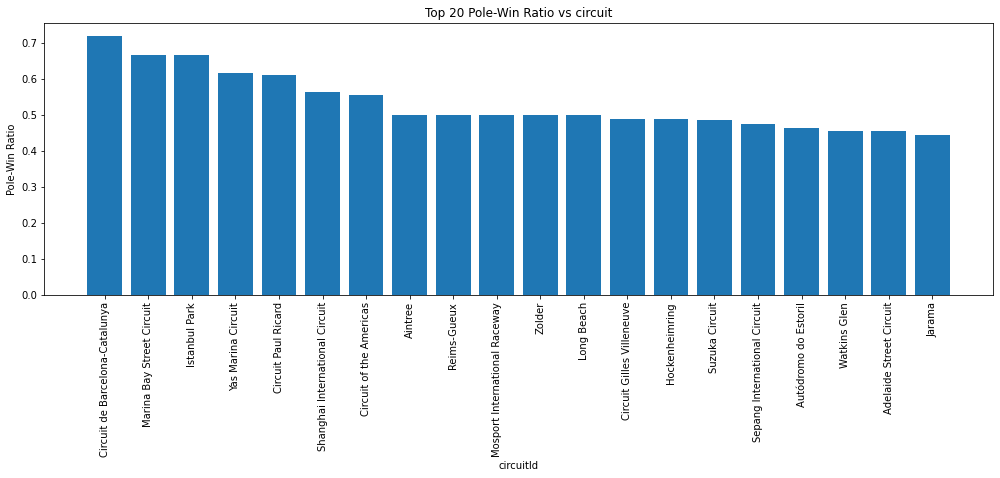

The Bottom 20: 
                                      name  group_pole_win_ratio
0   Autódromo Internacional Nelson Piquet              0.100000
1                      Circuit Bremgarten              0.166667
2                    Scandinavian Raceway              0.166667
3                                 Kyalami              0.200000
4                          Sochi Autodrom              0.250000
5             Indianapolis Motor Speedway              0.263158
6           Circuit de Nevers Magny-Cours              0.277778
7                            Brands Hatch              0.285714
8           Autódromo Juan y Oscar Gálvez              0.318182
9           Autodromo Enzo e Dino Ferrari              0.333333
10                      Baku City Circuit              0.333333
11                          Dijon-Prenois              0.333333
12           Autodromo Nazionale di Monza              0.342466
13                            Nürburgring              0.357143
14                     

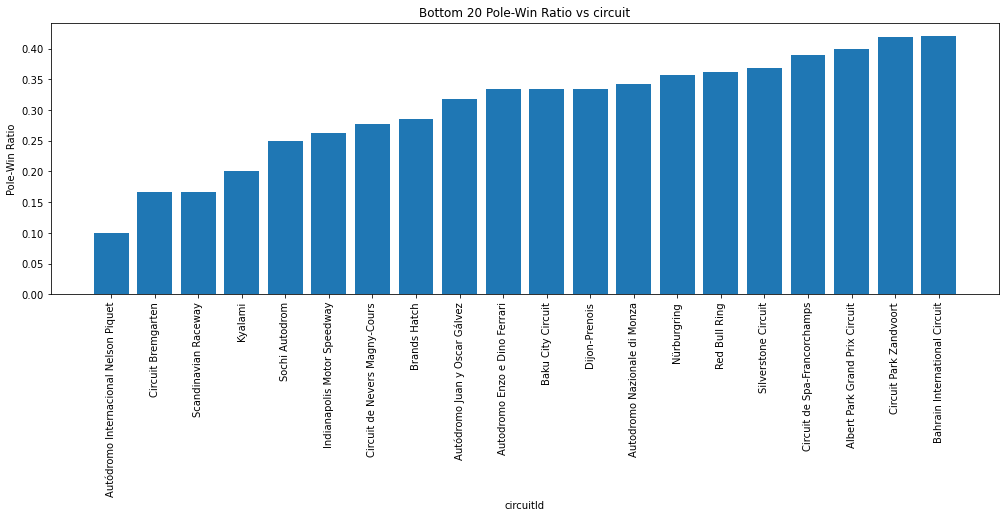

In [10]:
pwrfor(groupId = 'circuitId', relate = operator.eq, position = 1, minNumPole=5, n=20)


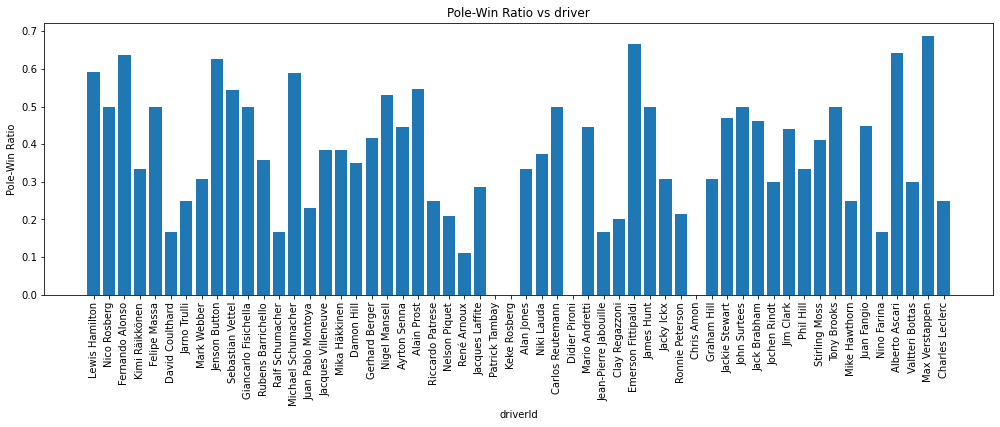

The Top 20: 
                     name  group_pole_win_ratio
0         Max Verstappen              0.687500
1     Emerson Fittipaldi              0.666667
2         Alberto Ascari              0.642857
3        Fernando Alonso              0.636364
4          Jenson Button              0.625000
5         Lewis Hamilton              0.592233
6     Michael Schumacher              0.588235
7            Alain Prost              0.545455
8       Sebastian Vettel              0.543860
9          Nigel Mansell              0.531250
10      Carlos Reutemann              0.500000
11          Nico Rosberg              0.500000
12          John Surtees              0.500000
13            James Hunt              0.500000
14          Felipe Massa              0.500000
15  Giancarlo Fisichella              0.500000
16           Tony Brooks              0.500000
17        Jackie Stewart              0.470588
18          Jack Brabham              0.461538
19           Juan Fangio              0.448276

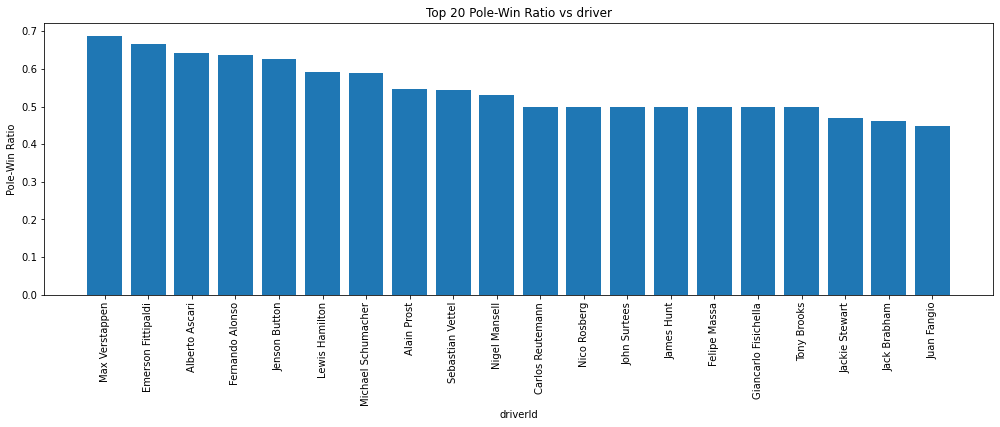

The Bottom 20: 
                      name  group_pole_win_ratio
0             René Arnoux              0.111111
1             Nino Farina              0.166667
2         David Coulthard              0.166667
3   Jean-Pierre Jabouille              0.166667
4         Ralf Schumacher              0.166667
5          Clay Regazzoni              0.200000
6           Nelson Piquet              0.208333
7         Ronnie Peterson              0.214286
8      Juan Pablo Montoya              0.230769
9         Charles Leclerc              0.250000
10          Mike Hawthorn              0.250000
11           Jarno Trulli              0.250000
12       Riccardo Patrese              0.250000
13        Jacques Laffite              0.285714
14           Jochen Rindt              0.300000
15        Valtteri Bottas              0.300000
16            Graham Hill              0.307692
17             Jacky Ickx              0.307692
18            Mark Webber              0.307692
19              Phil Hi

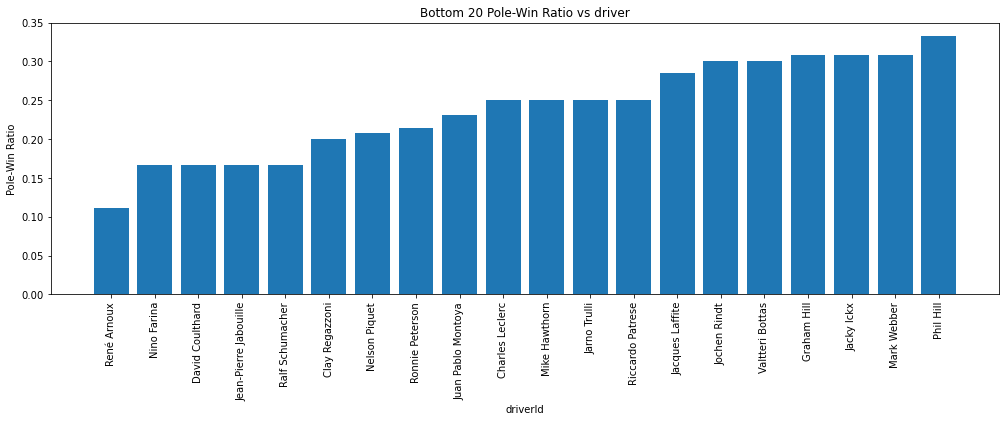

In [11]:
pwrfor(groupId='driverId',relate = operator.eq,position= 1, minNumPole=3, n=20)

<h3 style="color:orange">Pole-Top10 Ratio per Circuit and Driver</h3>

<h3 style="color:red">Driver and Circuit</h3>

In [12]:
res = pole_circuit_df[['driverId','circuitId','grid','positionOrder']]
res.rename(columns = {'driverId':"A",'circuitId':'B'},inplace=True)
res = res.groupby(['A','B']).apply(lambda dc :dc[dc['positionOrder']==1].size/dc.size)
dc_matrix = res.unstack(level=1).fillna(0)
dc_matrix['A']= dc_matrix.index
dc_matrix = dc_matrix.melt(id_vars="A",
        var_name="B", 
        value_name="value")
greatest_drivers = [0,29,19,116,101,3,49,94,327,181]
gd_df = dc_matrix[dc_matrix['A'].isin(greatest_drivers)]
greatest_circuits = [13,5,8,12,6,17,10,69,21,38]
gd_df = gd_df[gd_df['B']<200]
gd_df


c:\Users\ayush\anaconda3\lib\site-packages\pandas\core\frame.py:5039: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


,A,B,value
2,3,1,0.0
19,49,1,0.0
112,3,2,0.0
129,49,2,0.0
222,3,3,0.0
...,...,...,...
8049,49,77,0.0
8142,3,78,0.0
8159,49,78,0.0
8252,3,79,0.0


<h4 style="color:#00fa9a">Greatest Drivers</h4>

In [13]:
d_df = drivers_df.iloc[greatest_drivers]['name'].sort_values().reset_index(level=0)
d_df.rename(columns={'index':'driverId','name':'dname'},inplace=True)
print(d_df.to_string())


   driverId               dname
0       116         Alain Prost
1       101        Ayrton Senna
2         3     Fernando Alonso
3       327      Jackie Stewart
4        49      Jos Verstappen
5         0      Lewis Hamilton
6        29  Michael Schumacher
7        94       Nigel Mansell
8       181          Niki Lauda
9        19    Sebastian Vettel


<h4 style="color:#00fa9a">Greatest Circuits</h4>

In [14]:
gc_df = circuits_df.iloc[greatest_circuits]['name'].sort_values().reset_index(level=0)
gc_df.rename(columns={'index':'circuitId','name':'cname'},inplace=True)
print(gc_df.to_string())

   circuitId                         cname
0         13  Autodromo Nazionale di Monza
1         17    Autódromo José Carlos Pace
2          6     Circuit Gilles Villeneuve
3          5             Circuit de Monaco
4         12  Circuit de Spa-Francorchamps
5         10                   Hungaroring
6          8           Silverstone Circuit
7         69                Sochi Autodrom
8         21                Suzuka Circuit
9         38                        Zolder


       A   B  value
2      3   1    0.0
19    49   1    0.0
112    3   2    0.0
129   49   2    0.0
222    3   3    0.0
...   ..  ..    ...
8049  49  77    0.0
8142   3  78    0.0
8159  49  78    0.0
8252   3  79    0.0
8269  49  79    0.0

[152 rows x 3 columns]


<AxesSubplot:xlabel='B', ylabel='A'>

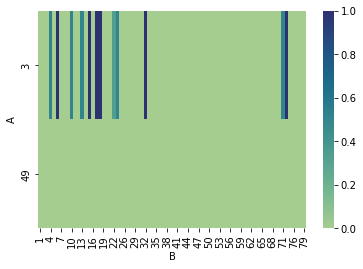

In [15]:
print(gd_df)
sb.heatmap(gd_df.pivot(index='A',columns='B',values='value'),cmap='crest')